# 0) Load the dataset + quick peek
**Why:** Confirm we can read the CSV from your path and see its basic shape/columns.  
**What this shows:** First 5 rows and a list of column names to guide analysis.


In [2]:
import pandas as pd

# ✅ Your dataset path
CSV_PATH = r"C:\Users\kanam\OneDrive\Desktop\data analysis project\archive (3)\social_media_engagement1.csv"

# Load
df = pd.read_csv(CSV_PATH)

# Peek
print("Rows, Columns:", df.shape)
display(df.head())
print("\nColumns:", df.columns.tolist())


Rows, Columns: (100, 9)


,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive



Columns: ['post_id', 'platform', 'post_type', 'post_time', 'likes', 'comments', 'shares', 'post_day', 'sentiment_score']


# 1) Setup plotting style + derive helpful columns
**Why:** A consistent look makes visuals presentation-ready; derived features (like `total_engagement`) simplify plots.  
**What this does:** Sets Seaborn theme, defines colors, parses timestamps, orders weekdays, and adds `total_engagement`.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Aesthetic style
sns.set_theme(style="whitegrid", context="talk")

platform_palette = {
    "Facebook": "#1877F2",
    "Instagram": "#E1306C",
    "Twitter":   "#1DA1F2"
}
sent_palette = {"positive":"#2ecc71", "neutral":"#f1c40f", "negative":"#e74c3c"}

# Derived features
df["total_engagement"] = df["likes"] + df["comments"] + df["shares"]

# Parse datetime & make Month
if "post_time" in df.columns:
    df["post_time"] = pd.to_datetime(df["post_time"], errors="coerce")
    df["month"] = df["post_time"].dt.to_period("M").astype(str)

# Order weekdays for nicer plots
days_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
if "post_day" in df.columns:
    df["post_day"] = pd.Categorical(df["post_day"], categories=days_order, ordered=True)


# 2) Average Engagement by Platform (grouped bars)
**Why:** Quickly compares how each platform performs on **likes, comments, shares**.  
**What this shows:** Mean engagement per type, side-by-side for Facebook/Instagram/Twitter.


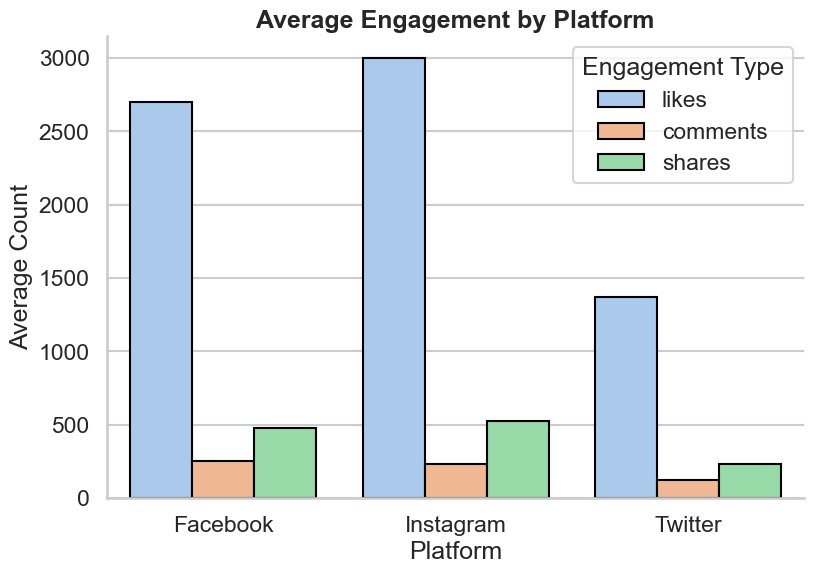

In [16]:
avg_engagement = (
    df.groupby("platform")[["likes","comments","shares"]]
      .mean()
      .reset_index()
      .melt(id_vars="platform", var_name="metric", value_name="avg_value")
)

plt.figure(figsize=(9,6))
sns.barplot(
    data=avg_engagement, x="platform", y="avg_value", hue="metric",
    palette="pastel", edgecolor="black"
)
plt.title("Average Engagement by Platform", weight="bold")
plt.ylabel("Average Count")
plt.xlabel("Platform")
plt.legend(title="Engagement Type")
sns.despine()
plt.show()


# 3) Likes Distribution by Post Type (boxplot)
**Why:** Checks whether **images/videos/polls/carousels** are consistently strong or only have outliers.  
**What this shows:** Spread of **likes** for each content format.


C:\Users\kanam\AppData\Local\Temp\ipykernel_6984\1640893159.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="post_type", y="likes", palette="Set2")


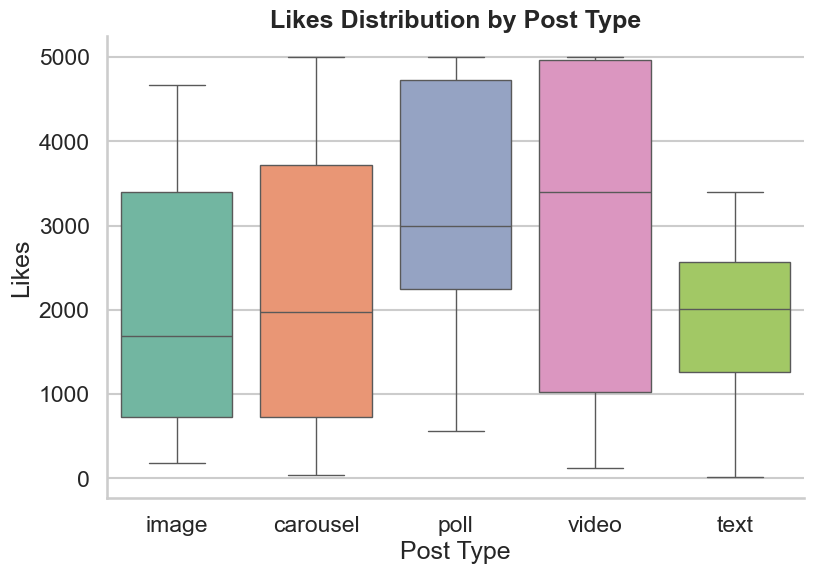

In [5]:
plt.figure(figsize=(9,6))
sns.boxplot(data=df, x="post_type", y="likes", palette="Set2")
plt.title("Likes Distribution by Post Type", weight="bold")
plt.ylabel("Likes")
plt.xlabel("Post Type")
sns.despine()
plt.show()


# 4) Sentiment vs Likes (violin)
**Why:** Tests whether **positive/neutral/negative** tone relates to audience response.  
**What this shows:** Full distribution of **likes** across sentiment categories.


C:\Users\kanam\AppData\Local\Temp\ipykernel_6984\441799713.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


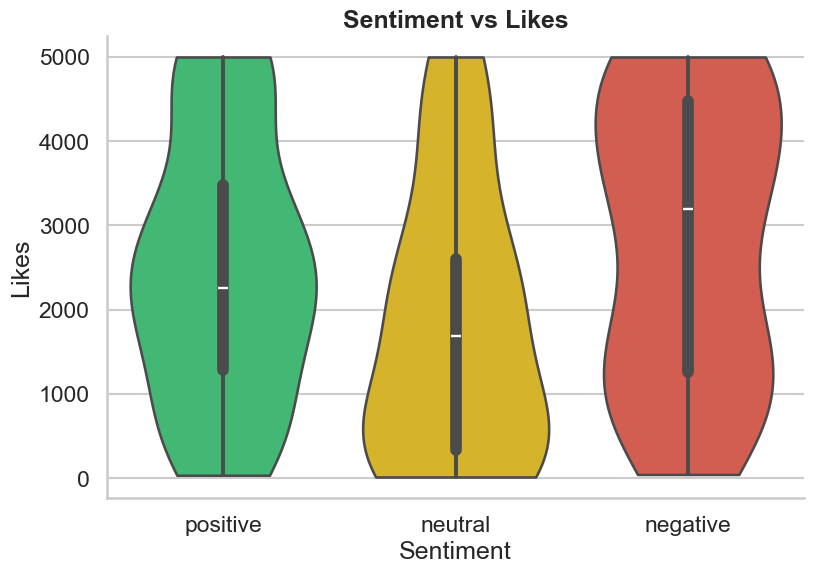

In [6]:
plt.figure(figsize=(9,6))
sns.violinplot(
    data=df, x="sentiment_score", y="likes",
    palette=sent_palette, cut=0
)
plt.title("Sentiment vs Likes", weight="bold")
plt.ylabel("Likes")
plt.xlabel("Sentiment")
sns.despine()
plt.show()


# 5) Engagement by Day of Week (multi-line)
**Why:** Helps decide **when** to post.  
**What this shows:** Average **likes, comments, shares** for each weekday.


C:\Users\kanam\AppData\Local\Temp\ipykernel_6984\3385187246.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_day = df.groupby("post_day")[["likes","comments","shares"]].mean().reset_index()


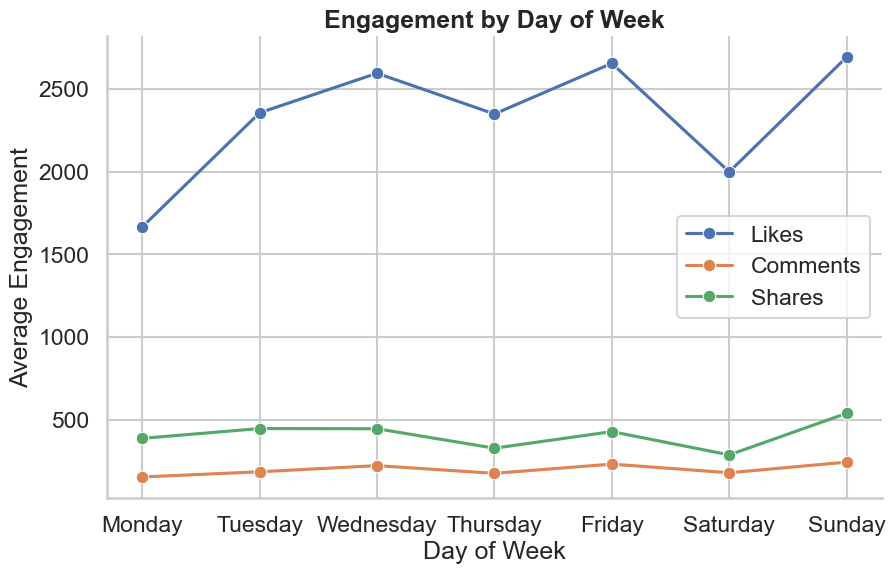

In [7]:
avg_day = df.groupby("post_day")[["likes","comments","shares"]].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=avg_day, x="post_day", y="likes", marker="o", label="Likes")
sns.lineplot(data=avg_day, x="post_day", y="comments", marker="o", label="Comments")
sns.lineplot(data=avg_day, x="post_day", y="shares", marker="o", label="Shares")
plt.title("Engagement by Day of Week", weight="bold")
plt.ylabel("Average Engagement")
plt.xlabel("Day of Week")
plt.legend()
sns.despine()
plt.show()


# 6) Average **Total** Engagement by Platform (single metric)
**Why:** A single “impact” number is easier to communicate than 3 separate metrics.  
**What this shows:** Mean of `likes+comments+shares` per platform.


C:\Users\kanam\AppData\Local\Temp\ipykernel_6984\1522871724.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


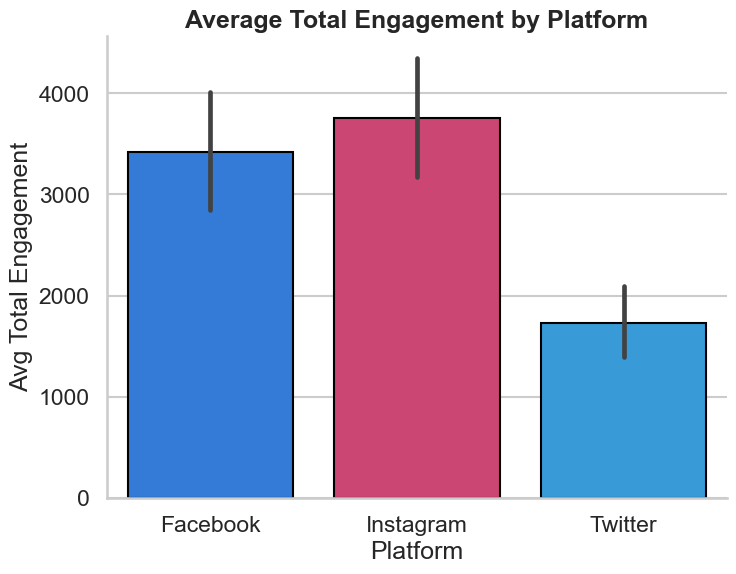

In [8]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=df, x="platform", y="total_engagement",
    estimator=np.mean, errorbar=("ci", 95),
    palette=platform_palette, edgecolor="black"
)
plt.title("Average Total Engagement by Platform", weight="bold")
plt.ylabel("Avg Total Engagement")
plt.xlabel("Platform")
sns.despine()
plt.show()


# 7) Post Type × Platform (which format works best on each platform?)
**Why:** Content strategy varies by channel; this finds **best post type per platform**.  
**What this shows:** Mean `total_engagement` for each (post_type, platform) pair.


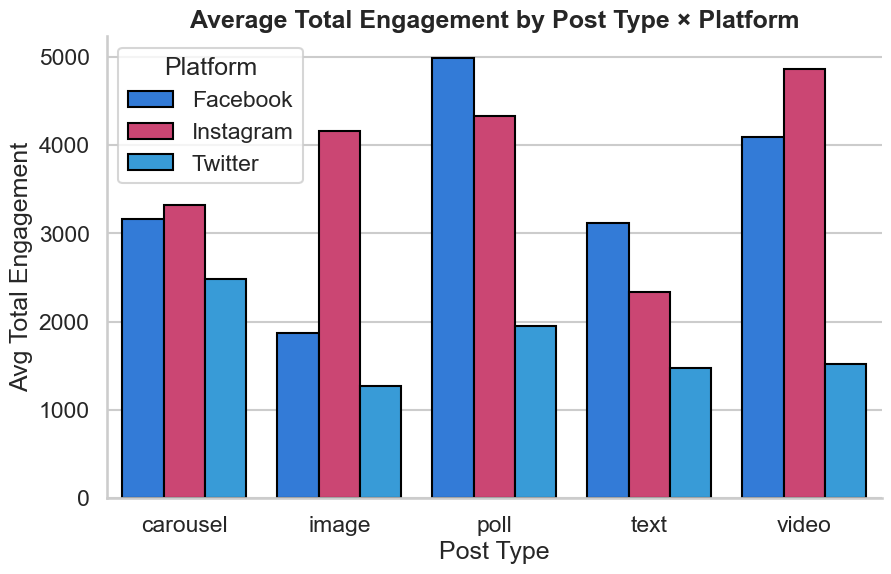

In [9]:
pt_pf = (
    df.groupby(["post_type","platform"])["total_engagement"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=pt_pf, x="post_type", y="total_engagement", hue="platform",
    palette=platform_palette, edgecolor="black"
)
plt.title("Average Total Engagement by Post Type × Platform", weight="bold")
plt.ylabel("Avg Total Engagement")
plt.xlabel("Post Type")
plt.legend(title="Platform")
sns.despine()
plt.show()


# 8) Sentiment × Platform (heatmap)
**Why:** Tone can work **differently** on each platform.  
**What this shows:** Heatmap of average `total_engagement` by **platform × sentiment**.


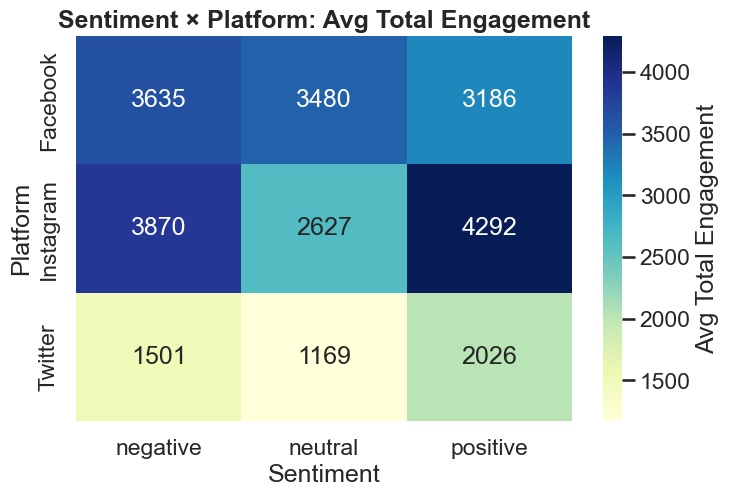

In [10]:
pivot_sp = df.pivot_table(
    index="platform", columns="sentiment_score",
    values="total_engagement", aggfunc="mean"
)

# Optional: order platforms
platform_order = ["Facebook","Instagram","Twitter"]
pivot_sp = pivot_sp.reindex(index=[p for p in platform_order if p in pivot_sp.index])

plt.figure(figsize=(8,5))
sns.heatmap(pivot_sp, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={"label":"Avg Total Engagement"})
plt.title("Sentiment × Platform: Avg Total Engagement", weight="bold")
plt.xlabel("Sentiment")
plt.ylabel("Platform")
plt.show()


# 9) Monthly Engagement Trend by Platform (line)
**Why:** Surfaces **temporal patterns** (seasonality/spikes).  
**What this shows:** Average `total_engagement` by month, one line per platform.


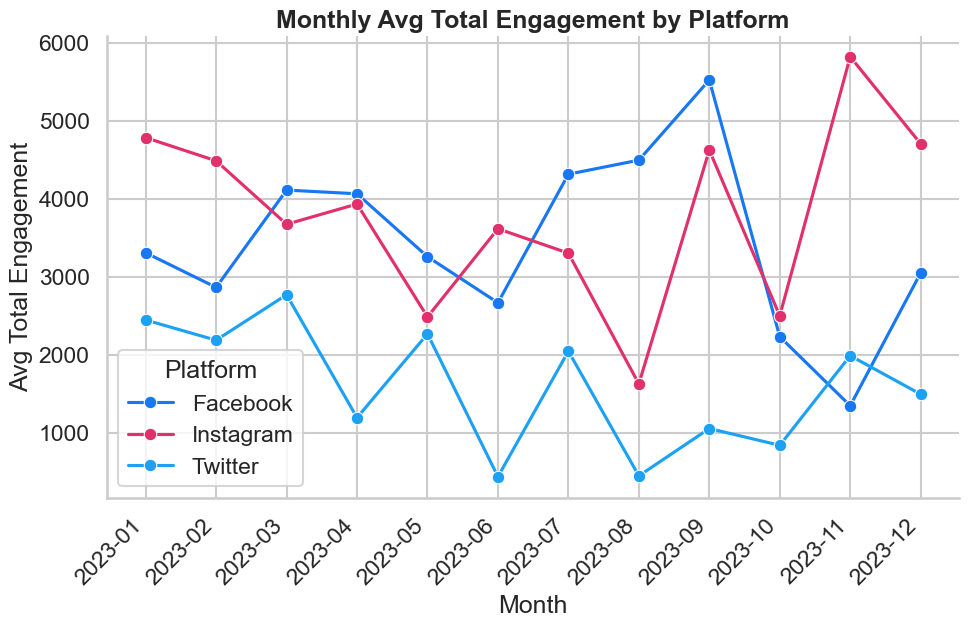

In [11]:
if "month" in df.columns:
    monthly = (
        df.dropna(subset=["month"])
          .groupby(["month","platform"])["total_engagement"]
          .mean()
          .reset_index()
    )

    plt.figure(figsize=(11,6))
    sns.lineplot(
        data=monthly, x="month", y="total_engagement",
        hue="platform", marker="o", palette=platform_palette
    )
    plt.title("Monthly Avg Total Engagement by Platform", weight="bold")
    plt.ylabel("Avg Total Engagement")
    plt.xlabel("Month")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Platform")
    sns.despine()
    plt.show()
else:
    print("Skipping monthly trend: 'month' column not present (check parsing cell).")


# 10) Correlation among engagement metrics (heatmap)
**Why:** Understand how signals relate (e.g., do likes move with shares?).  
**What this shows:** Correlation matrix for likes/comments/shares/total.


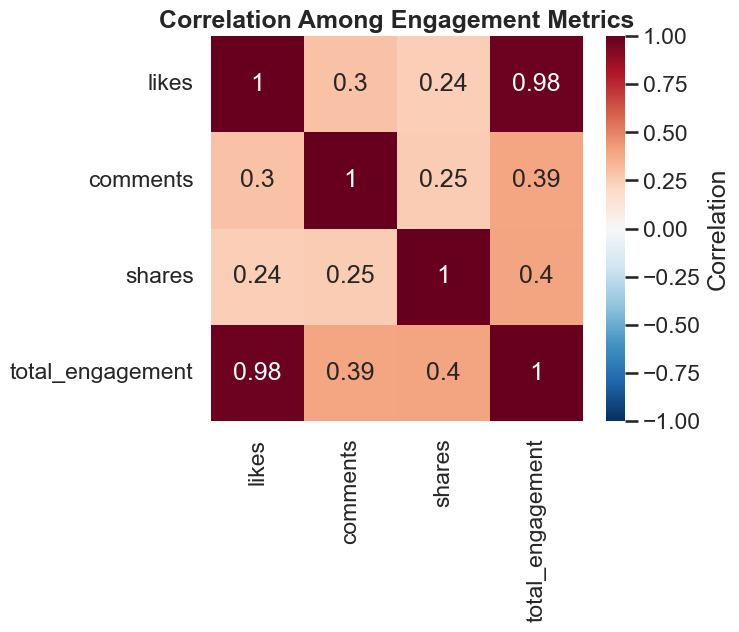

In [12]:
corr = df[["likes","comments","shares","total_engagement"]].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="RdBu_r", vmin=-1, vmax=1, cbar_kws={"label":"Correlation"})
plt.title("Correlation Among Engagement Metrics", weight="bold")
plt.show()


# 11) Top 10 Posts by Total Engagement (horizontal bars)
**Why:** Quick showcase of **best-performing posts**.  
**What this shows:** Top 10 `post_id`s with highest `total_engagement`, colored by platform.


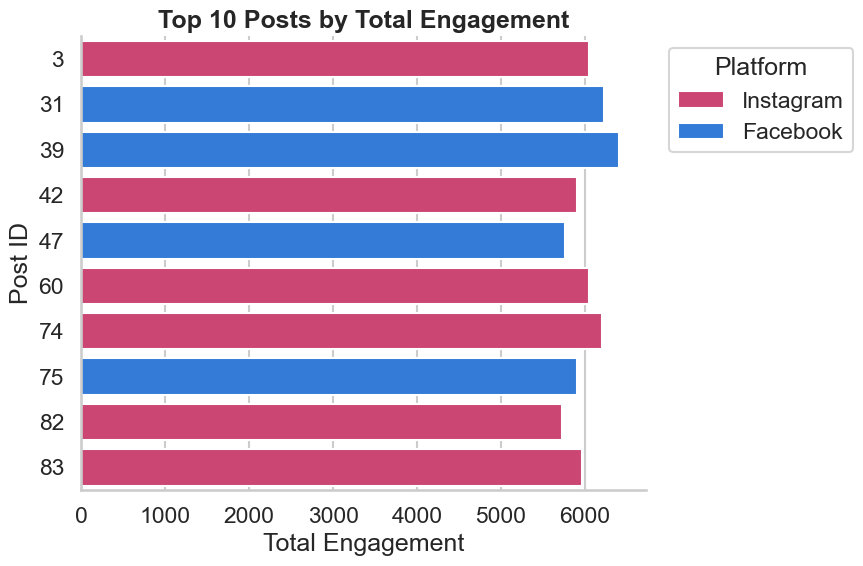

In [13]:
top10 = (
    df.nlargest(10, "total_engagement")
      .loc[:, ["post_id","platform","post_type","total_engagement"]]
      .sort_values("total_engagement")
)

plt.figure(figsize=(9,6))
sns.barplot(
    data=top10, y="post_id", x="total_engagement",
    hue="platform", palette=platform_palette, dodge=False, orient="h"
)
plt.title("Top 10 Posts by Total Engagement", weight="bold")
plt.xlabel("Total Engagement")
plt.ylabel("Post ID")
plt.legend(title="Platform", bbox_to_anchor=(1.02, 1), loc="upper left")
sns.despine()
plt.tight_layout()
plt.show()


# 12) Engagement Composition by Platform (stacked proportions)
**Why:** Shows **audience behavior** differences (are they more likely to like, comment, or share?)  
**What this shows:** Proportion of likes vs comments vs shares per platform.


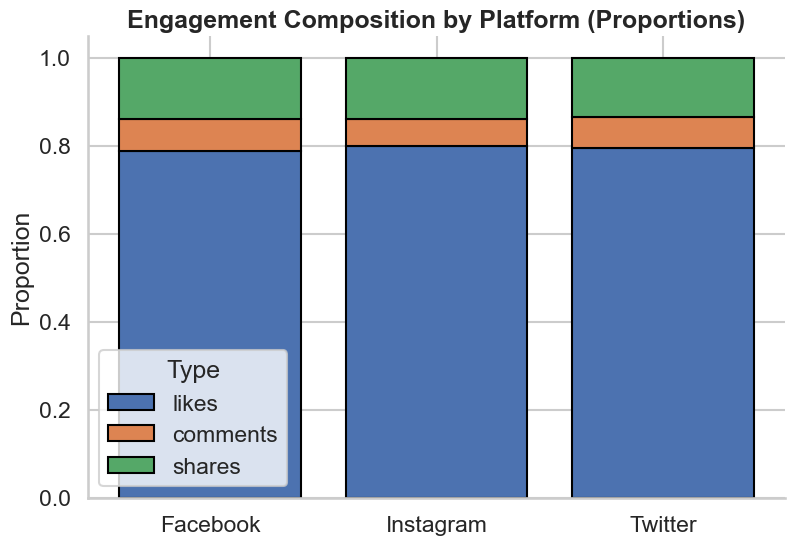

In [14]:
comp = df.groupby("platform")[["likes","comments","shares"]].mean()
# optional ordering
comp = comp.loc[[p for p in ["Facebook","Instagram","Twitter"] if p in comp.index]]

# proportions
comp_prop = comp.div(comp.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(9,6))
bottom = np.zeros(len(comp_prop))
x = np.arange(len(comp_prop.index))

for col in ["likes","comments","shares"]:
    ax.bar(x, comp_prop[col].values, bottom=bottom, label=col, edgecolor="black")
    bottom += comp_prop[col].values

ax.set_xticks(x)
ax.set_xticklabels(comp_prop.index)
ax.set_ylabel("Proportion")
ax.set_title("Engagement Composition by Platform (Proportions)", weight="bold")
ax.legend(title="Type")
sns.despine()
plt.show()
